# Plot confusion matrix for squeezenet

In [117]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
print("Tensorflow version " + tf.__version__)
AUTOTUNE = tf.data.AUTOTUNE

Tensorflow version 2.5.0


In [118]:
# Load model
model = tf.keras.models.load_model('models/squeezenet-binary.h5')

In [119]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 32)   320         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 32)   128         conv2d[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 32, 32, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [120]:
df = pd.read_json('../data/labelled_data/prepared-samples-binary.json')

y = df['label'].to_numpy()
X = np.array(df['data'].to_list())
X = np.expand_dims(X, axis=3)
print(y.shape)
print(X.shape)

(200,)
(200, 32, 32, 1)


In [121]:
# Create train / val / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

In [122]:
# predictions
label = {1: 'Human',
         0: 'No Human'}

pred = model.predict(X_val)

classes = np.argmax(pred, axis = 1)

print(classes)

[0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]


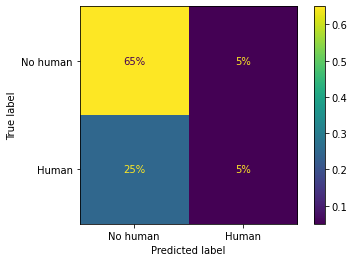

In [125]:
conf_matrix = confusion_matrix(y_true=y_val, y_pred=classes)

classNames = ['No human', 'Human']

# Convert to discrete values for confusion matrix
cm = confusion_matrix(y_test, classes, normalize="all")
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classNames)
disp.plot(values_format=".0%")

plt.savefig('confusion-cnn.png', dpi=200)
